Inspect minimization results

In [60]:
from glob import glob

In [61]:
fnames = glob('../bayes_implicit_solvent/data/all_types_newton-cg_freesolv_n_config=100_smiles_ind=*_gaussian_ll.npy')

In [62]:
len(fnames)

642

In [63]:
import numpy as np

In [64]:
thetas = list(map(np.load, fnames))

In [65]:
thetas[0]

array([0.14809923, 0.14140771, 0.12318463, 0.13925251, 0.1223743 ,
       0.12238308, 0.12236414, 0.84979658, 0.84895926, 0.84925009,
       0.85013432, 0.84938589, 0.84938491, 0.84938721])

In [66]:
X = []

def unpack(theta):
    n = int((len(theta)) / 2)
    radii, scales = theta[:n], theta[n:2 * n]
    return radii, scales

for theta in thetas:
    radii, scales = unpack(theta)
    for i in range(len(radii)):
        X.append([radii[i], scales[i]])
X = np.array(X)

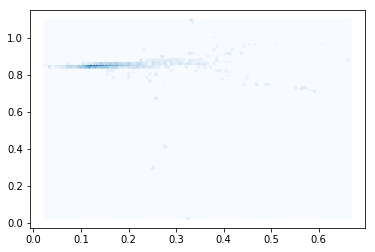

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hexbin(X[:,0], X[:,1], bins='log', cmap='Blues');


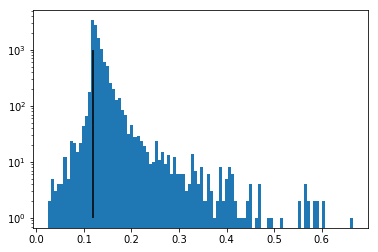

In [68]:
plt.hist(X[:,0], bins=100);
plt.vlines(0.12,1,10**3)
plt.yscale('log')

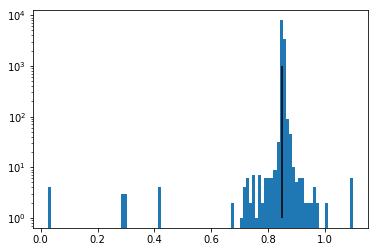

In [69]:
plt.hist(X[:,1], bins=100);
plt.vlines(0.85,1,10**3)
plt.yscale('log')

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA()

In [72]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [73]:
y = pca.transform(X)

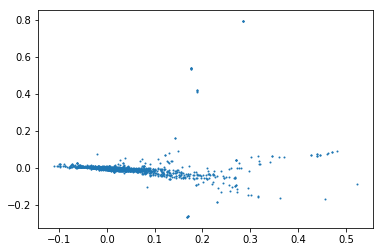

In [74]:
plt.scatter(y[:,0], y[:,1], s=1);

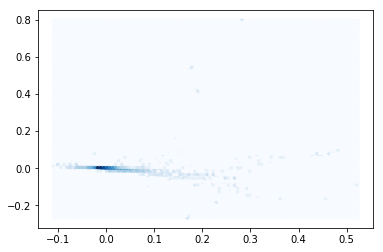

In [75]:
plt.hexbin(y[:,0], y[:,1], bins='log', cmap='Blues');